## BUSINESS PROBLEM

In [ ]:
#The data is related with direct marketing campaigns of a Portuguese banking institution. 
#The marketing campaigns were based on phone calls. 
#Often, more than one contact to the same client was required, in order to access
#if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
#The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
#The classification goal is to predict if the client will subscribe a term deposit(variable y).

In [ ]:
#column information 
- Age (numeric)
- Job : type of job (categorical: ‘admin.’, ‘blue-collar’, ‘entrepreneur’, ‘housemaid’, ‘management’, ‘retired’, ‘self-employed’, ‘services’, ‘student’, ‘technician’, ‘unemployed’, ‘unknown’)
- Marital : marital status (categorical: ‘divorced’, ‘married’, ‘single’, ‘unknown’ ; note: ‘divorced’ means divorced or widowed)
- Education (categorical: ‘basic.4y’, ‘basic.6y’, ‘basic.9y’, ‘high.school’, ‘illiterate’, ‘professional.course’, ‘university.degree’, ‘unknown’)
- Default: has credit in default? (categorical: ‘no’, ‘yes’, ‘unknown’)
- Housing: has housing loan? (categorical: ‘no’, ‘yes’, ‘unknown’)
- Loan: has personal loan? (categorical: ‘no’, ‘yes’, ‘unknown’)
- balance: average yearly balance, in euros (numeric)

- Contact: contact communication type (categorical: ‘cellular’,‘telephone’)

- Month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
- Day_of_week: last contact day of the week (categorical: ‘mon’,‘tue’,‘wed’,‘thu’,‘fri’)
- Duration: last contact duration, in seconds (numeric).

- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,‘nonexistent’,‘success’)
- y: has the client subscribed a term deposit? (binary: ‘yes’, ‘no’)

## IMPORT LIBRARIES

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## UPLOAD DATASET

In [209]:
bank_data=pd.read_csv(r"D://kaggle datasets//banking dataset//bank marketing//bank_full_train.csv")


## CHECK THE DATA 

In [210]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ID,y
0,45,blue-collar,married,secondary,no,2,no,no,cellular,26,aug,105,10,-1,0,unknown,22944,no
1,34,admin.,divorced,secondary,no,0,no,no,cellular,10,jul,268,1,-1,0,unknown,13870,no
2,40,technician,divorced,secondary,no,311,no,no,cellular,6,aug,738,2,-1,0,unknown,19301,yes
3,58,self-employed,married,tertiary,no,5810,no,no,cellular,12,mar,139,1,-1,0,unknown,31334,yes
4,59,blue-collar,married,secondary,no,169,yes,no,unknown,16,may,181,3,-1,0,unknown,3849,no


In [211]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ID,y
31642,37,technician,married,secondary,no,6963,yes,no,cellular,22,dec,158,2,-1,0,unknown,42547,no
31643,54,management,married,tertiary,no,8295,no,no,cellular,2,oct,849,2,119,1,success,41684,yes
31644,47,technician,married,tertiary,no,192,yes,no,unknown,26,may,596,1,-1,0,unknown,5827,no
31645,39,admin.,married,secondary,no,0,yes,no,cellular,17,jul,69,1,-1,0,unknown,15012,no
31646,46,blue-collar,married,primary,no,143,yes,no,unknown,7,may,279,1,-1,0,unknown,965,no


In [212]:
bank_data.shape

(31647, 18)

In [213]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31647 non-null  int64 
 1   job        31647 non-null  object
 2   marital    31647 non-null  object
 3   education  31647 non-null  object
 4   default    31647 non-null  object
 5   balance    31647 non-null  int64 
 6   housing    31647 non-null  object
 7   loan       31647 non-null  object
 8   contact    31647 non-null  object
 9   day        31647 non-null  int64 
 10  month      31647 non-null  object
 11  duration   31647 non-null  int64 
 12  campaign   31647 non-null  int64 
 13  pdays      31647 non-null  int64 
 14  previous   31647 non-null  int64 
 15  poutcome   31647 non-null  object
 16  ID         31647 non-null  int64 
 17  y          31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [214]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous,ID
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.914684,1348.265902,15.765791,258.329194,2.757639,40.105381,0.573640,22611.890606
std,10.621688,3045.202189,8.312245,255.658170,3.084175,100.089075,2.419964,13066.970590
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,11276.500000
50%,39.000000,445.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,22625.000000
75%,48.000000,1414.000000,21.000000,320.000000,3.000000,-1.000000,0.000000,33953.500000
max,95.000000,102127.000000,31.000000,3785.000000,58.000000,854.000000,275.000000,45211.000000


## VISUALIZE THE DATA

In [215]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'ID', 'y'],
      dtype='object')

In [216]:
bank_data['job'].value_counts()

blue-collar      6884
management       6616
technician       5278
admin.           3625
services         2888
retired          1587
self-employed    1090
entrepreneur     1051
unemployed        902
housemaid         855
student           660
unknown           211
Name: job, dtype: int64

In [217]:
bank_data["marital"].value_counts()

married     19038
single       8995
divorced     3614
Name: marital, dtype: int64

In [105]:
bank_data['education'].value_counts()

secondary    16313
tertiary      9219
primary       4807
unknown       1308
Name: education, dtype: int64

In [107]:
bank_data['default'].value_counts()

no     31090
yes      557
Name: default, dtype: int64

In [108]:
bank_data['loan'].value_counts()

no     26550
yes     5097
Name: loan, dtype: int64

In [109]:
bank_data['housing'].value_counts()


yes    17640
no     14007
Name: housing, dtype: int64

In [110]:
bank_data['contact'].value_counts()

cellular     20463
unknown       9129
telephone     2055
Name: contact, dtype: int64

In [148]:
bank_data['month'].value_counts()

may    9654
jul    4813
aug    4369
jun    3727
nov    2778
apr    2086
feb    1871
jan     956
oct     520
sep     405
mar     330
dec     138
Name: month, dtype: int64

In [112]:
bank_data['poutcome'].value_counts()

unknown    25899
failure     3393
other       1306
success     1049
Name: poutcome, dtype: int64

In [113]:
bank_data['y'].value_counts()

no     27927
yes     3720
Name: y, dtype: int64

In [147]:
bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous,ID
age,1.000000,0.104712,-0.006600,-0.007348,0.001913,-0.020160,0.004687,0.015275
balance,0.104712,1.000000,0.007062,0.016683,-0.016555,0.003595,0.014816,0.074520
day,-0.006600,0.007062,1.000000,-0.032348,0.164046,-0.094333,-0.051682,-0.059522
duration,-0.007348,0.016683,-0.032348,1.000000,-0.084246,-0.002576,-0.000881,0.010979
campaign,0.001913,-0.016555,0.164046,-0.084246,1.000000,-0.088245,-0.028829,-0.105699
pdays,-0.020160,0.003595,-0.094333,-0.002576,-0.088245,1.000000,0.428668,0.437037
previous,0.004687,0.014816,-0.051682,-0.000881,-0.028829,0.428668,1.000000,0.255305
ID,0.015275,0.074520,-0.059522,0.010979,-0.105699,0.437037,0.255305,1.000000


In [92]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.914684,1348.265902,15.765791,258.329194,2.757639,40.105381,0.573640
std,10.621688,3045.202189,8.312245,255.658170,3.084175,100.089075,2.419964
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,445.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,48.000000,1414.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,3785.000000,58.000000,854.000000,275.000000


<AxesSubplot:xlabel='job', ylabel='count'>

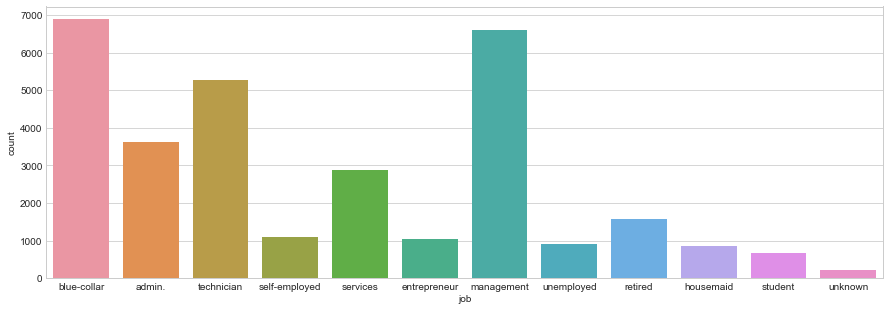

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(x='job', data=bank_data)


<AxesSubplot:xlabel='marital', ylabel='count'>

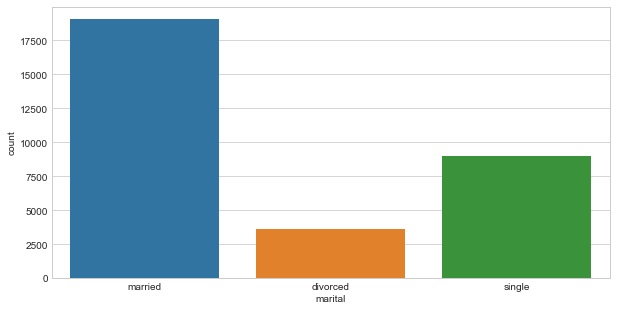

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x='marital',data=bank_data)

In [ ]:
# married people attend the call most of the time

<AxesSubplot:xlabel='education', ylabel='count'>

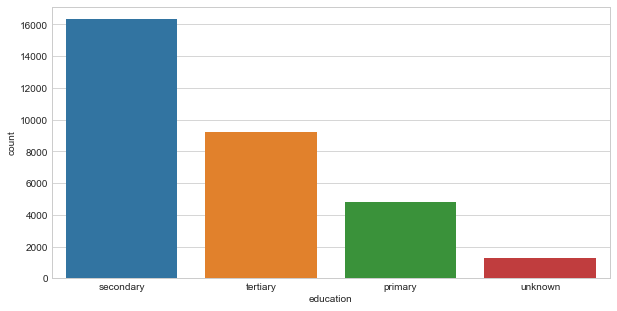

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='education', data=bank_data)

In [ ]:
# secondary education have pepole called most of the time

<AxesSubplot:xlabel='default', ylabel='count'>

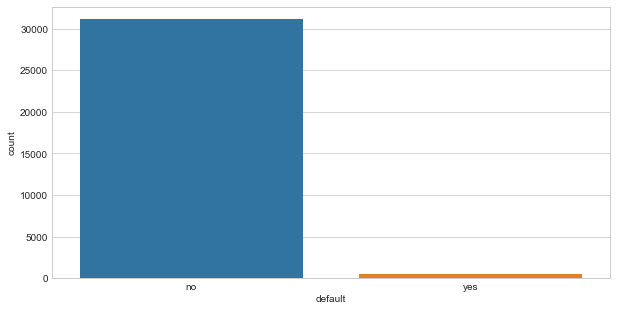

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='default',data=bank_data) 

In [ ]:
# no defaulter people called most of the time.

<AxesSubplot:xlabel='loan', ylabel='count'>

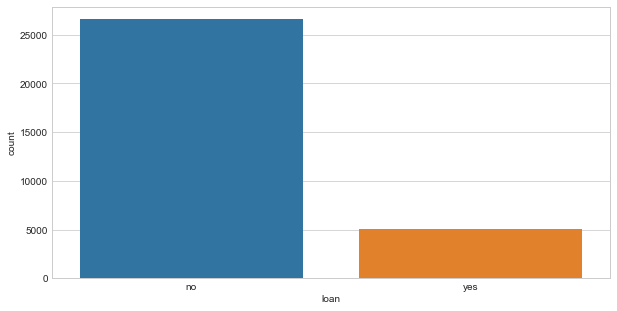

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x='loan',data=bank_data) 

In [ ]:
# most of the people does not have loan.

<AxesSubplot:xlabel='housing', ylabel='count'>

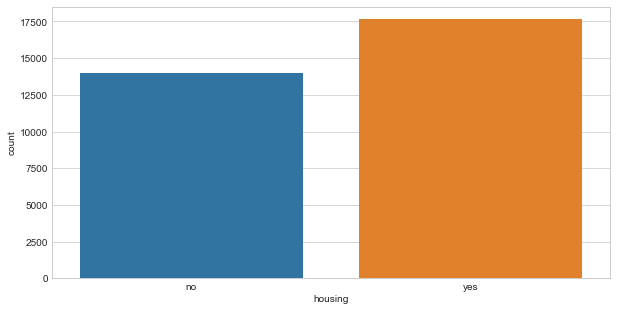

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(x='housing',data=bank_data) 

In [ ]:
# most of the people have housing loan

<AxesSubplot:xlabel='month', ylabel='count'>

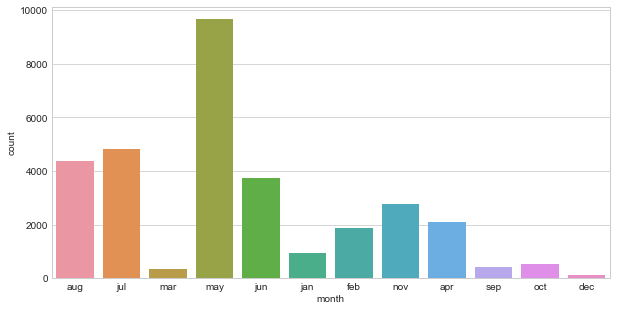

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',data=bank_data) 

In [ ]:
# on month may most of the call observed

<AxesSubplot:xlabel='poutcome', ylabel='count'>

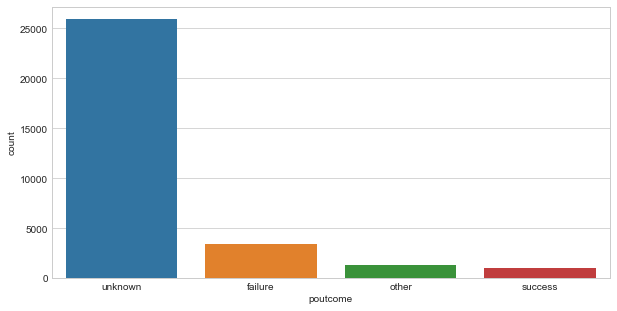

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(x='poutcome',data=bank_data) 

In [ ]:
# previous outcome was unknown most of the times

<AxesSubplot:xlabel='y', ylabel='count'>

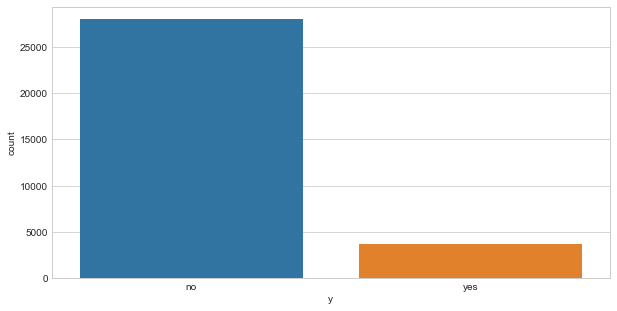

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x='y',data=bank_data) 

In [ ]:
# mostly  Not subscribed the term deposit. 

<AxesSubplot:xlabel='contact', ylabel='count'>

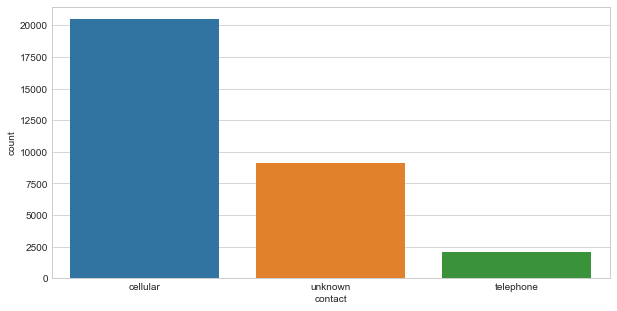

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='contact',data=bank_data) 

In [ ]:
# mostly used mobile numbers to call the customers.

In [218]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ID,y
0,45,blue-collar,married,secondary,no,2,no,no,cellular,26,aug,105,10,-1,0,unknown,22944,no
1,34,admin.,divorced,secondary,no,0,no,no,cellular,10,jul,268,1,-1,0,unknown,13870,no
2,40,technician,divorced,secondary,no,311,no,no,cellular,6,aug,738,2,-1,0,unknown,19301,yes
3,58,self-employed,married,tertiary,no,5810,no,no,cellular,12,mar,139,1,-1,0,unknown,31334,yes
4,59,blue-collar,married,secondary,no,169,yes,no,unknown,16,may,181,3,-1,0,unknown,3849,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,37,technician,married,secondary,no,6963,yes,no,cellular,22,dec,158,2,-1,0,unknown,42547,no
31643,54,management,married,tertiary,no,8295,no,no,cellular,2,oct,849,2,119,1,success,41684,yes
31644,47,technician,married,tertiary,no,192,yes,no,unknown,26,may,596,1,-1,0,unknown,5827,no
31645,39,admin.,married,secondary,no,0,yes,no,cellular,17,jul,69,1,-1,0,unknown,15012,no


In [219]:
bank_data=bank_data.drop('ID',axis=1)


In [220]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,45,blue-collar,married,secondary,no,2,no,no,cellular,26,aug,105,10,-1,0,unknown,no
1,34,admin.,divorced,secondary,no,0,no,no,cellular,10,jul,268,1,-1,0,unknown,no
2,40,technician,divorced,secondary,no,311,no,no,cellular,6,aug,738,2,-1,0,unknown,yes
3,58,self-employed,married,tertiary,no,5810,no,no,cellular,12,mar,139,1,-1,0,unknown,yes
4,59,blue-collar,married,secondary,no,169,yes,no,unknown,16,may,181,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,37,technician,married,secondary,no,6963,yes,no,cellular,22,dec,158,2,-1,0,unknown,no
31643,54,management,married,tertiary,no,8295,no,no,cellular,2,oct,849,2,119,1,success,yes
31644,47,technician,married,tertiary,no,192,yes,no,unknown,26,may,596,1,-1,0,unknown,no
31645,39,admin.,married,secondary,no,0,yes,no,cellular,17,jul,69,1,-1,0,unknown,no


In [ ]:
# explore Numeric variables

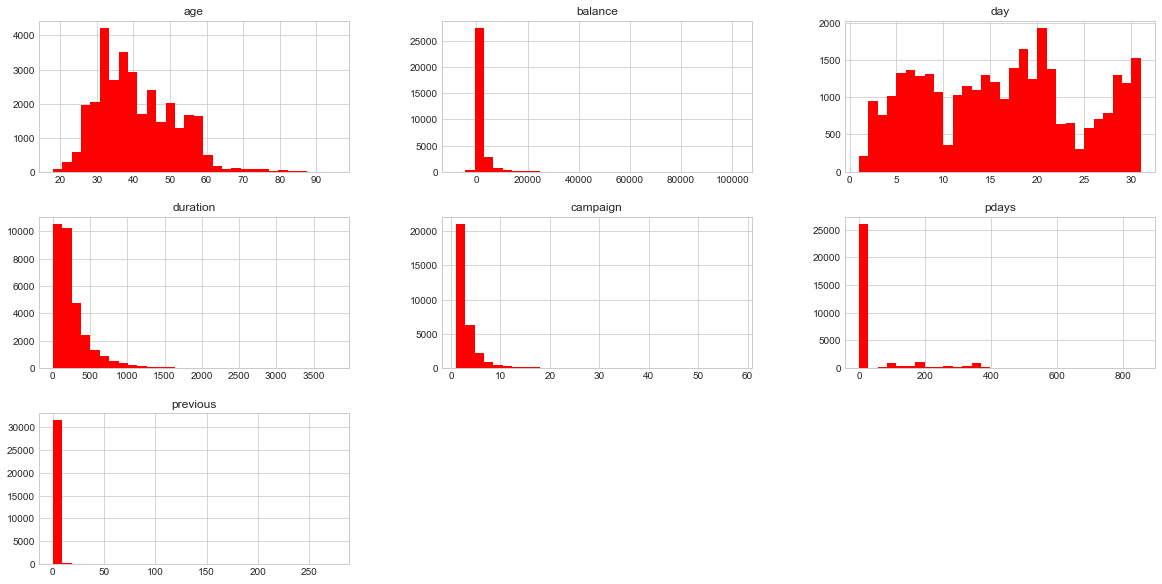

In [62]:
plt.style.use('seaborn-whitegrid')
bank_data.hist(bins=30,figsize=(20,10), color='red')
plt.show();
               

In [ ]:
# checking null values

In [182]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [183]:
bank_data.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,45,blue-collar,married,secondary,no,2,no,no,cellular,26,aug,105,10,-1,0,unknown,no
1,34,admin.,divorced,secondary,no,0,no,no,cellular,10,jul,268,1,-1,0,unknown,no
2,40,technician,divorced,secondary,no,311,no,no,cellular,6,aug,738,2,-1,0,unknown,yes
3,58,self-employed,married,tertiary,no,5810,no,no,cellular,12,mar,139,1,-1,0,unknown,yes
4,59,blue-collar,married,secondary,no,169,yes,no,unknown,16,may,181,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,37,technician,married,secondary,no,6963,yes,no,cellular,22,dec,158,2,-1,0,unknown,no
31643,54,management,married,tertiary,no,8295,no,no,cellular,2,oct,849,2,119,1,success,yes
31644,47,technician,married,tertiary,no,192,yes,no,unknown,26,may,596,1,-1,0,unknown,no
31645,39,admin.,married,secondary,no,0,yes,no,cellular,17,jul,69,1,-1,0,unknown,no


In [153]:
display(bank_data.drop_duplicates())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,45,blue-collar,married,secondary,no,2,no,no,cellular,26,aug,105,10,-1,0,unknown,no
1,34,admin.,divorced,secondary,no,0,no,no,cellular,10,jul,268,1,-1,0,unknown,no
2,40,technician,divorced,secondary,no,311,no,no,cellular,6,aug,738,2,-1,0,unknown,yes
3,58,self-employed,married,tertiary,no,5810,no,no,cellular,12,mar,139,1,-1,0,unknown,yes
4,59,blue-collar,married,secondary,no,169,yes,no,unknown,16,may,181,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,37,technician,married,secondary,no,6963,yes,no,cellular,22,dec,158,2,-1,0,unknown,no
31643,54,management,married,tertiary,no,8295,no,no,cellular,2,oct,849,2,119,1,success,yes
31644,47,technician,married,tertiary,no,192,yes,no,unknown,26,may,596,1,-1,0,unknown,no
31645,39,admin.,married,secondary,no,0,yes,no,cellular,17,jul,69,1,-1,0,unknown,no


In [154]:
bank_data.mean()



age           40.914684
balance     1348.265902
day           15.765791
duration     258.329194
campaign       2.757639
pdays         40.105381
previous       0.573640
dtype: float64

In [221]:
y=bank_data.iloc[:,16]

In [222]:
y

0         no
1         no
2        yes
3        yes
4         no
        ... 
31642     no
31643    yes
31644     no
31645     no
31646     no
Name: y, Length: 31647, dtype: object

In [223]:
y=pd.get_dummies(bank_data['y'])

In [224]:
y

,no,yes
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
31642,1,0
31643,0,1
31644,1,0
31645,1,0


In [225]:
y=y.drop('no',axis=1)

In [226]:
y.shape

(31647, 1)

In [227]:
y=y.iloc[:,0]

In [191]:
y

0        0
1        0
2        1
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    0
Name: yes, Length: 31647, dtype: uint8

In [228]:
X= bank_data.iloc[:,0:16]

In [229]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,45,blue-collar,married,secondary,no,2,no,no,cellular,26,aug,105,10,-1,0,unknown
1,34,admin.,divorced,secondary,no,0,no,no,cellular,10,jul,268,1,-1,0,unknown
2,40,technician,divorced,secondary,no,311,no,no,cellular,6,aug,738,2,-1,0,unknown
3,58,self-employed,married,tertiary,no,5810,no,no,cellular,12,mar,139,1,-1,0,unknown
4,59,blue-collar,married,secondary,no,169,yes,no,unknown,16,may,181,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,37,technician,married,secondary,no,6963,yes,no,cellular,22,dec,158,2,-1,0,unknown
31643,54,management,married,tertiary,no,8295,no,no,cellular,2,oct,849,2,119,1,success
31644,47,technician,married,tertiary,no,192,yes,no,unknown,26,may,596,1,-1,0,unknown
31645,39,admin.,married,secondary,no,0,yes,no,cellular,17,jul,69,1,-1,0,unknown


In [230]:
X=pd.get_dummies(X,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'])

In [231]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,45,2,26,105,10,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,34,0,10,268,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,40,311,6,738,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,58,5810,12,139,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,169,16,181,3,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,37,6963,22,158,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31643,54,8295,2,849,2,119,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
31644,47,192,26,596,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31645,39,0,17,69,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [232]:
X=X.drop('poutcome_unknown',axis=1)

In [233]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,45,2,26,105,10,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,34,0,10,268,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,40,311,6,738,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58,5810,12,139,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,59,169,16,181,3,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,37,6963,22,158,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31643,54,8295,2,849,2,119,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
31644,47,192,26,596,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
31645,39,0,17,69,1,-1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [234]:
X.shape

(31647, 50)

In [235]:
X=X.values

In [236]:
X

array([[ 45,   2,  26, ...,   0,   0,   0],
       [ 34,   0,  10, ...,   0,   0,   0],
       [ 40, 311,   6, ...,   0,   0,   0],
       ...,
       [ 47, 192,  26, ...,   0,   0,   0],
       [ 39,   0,  17, ...,   0,   0,   0],
       [ 46, 143,   7, ...,   0,   0,   0]], dtype=int64)

In [237]:
y=y.values

In [238]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [239]:
y.shape

(31647,)

## Buid The Model

In [240]:
from sklearn.model_selection import train_test_split 

In [252]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=121)

In [253]:
X_train.shape

(25317, 50)

In [254]:
X_test.shape

(6330, 50)

In [255]:
y_train.shape

(25317,)

In [256]:
y_test.shape

(6330,)

In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
model_lr = LogisticRegression()

In [259]:
model_lr.fit(X_train,y_train)

C:\Users\Darshil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Test The Model

In [261]:
y_pred=model_lr.predict(X_test)

In [262]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [263]:
from sklearn.metrics import accuracy_score

In [270]:
accuracy_score(y_test,y_pred)

0.8875197472353871

In [ ]:
# model accuracy observed 88%

In [271]:
from sklearn.metrics import confusion_matrix

In [272]:
confusion_matrix(y_test,y_pred)

array([[5460,  119],
       [ 593,  158]], dtype=int64)

In [ ]:
# true positive = 5460, False positive = 119, False Negative = 593, True Negative =158

#  Model on Test Data

In [273]:
bank_test= pd.read_csv(r"D://kaggle datasets//banking dataset//bank marketing//bank_full_test.csv")

In [274]:
bank_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,ID
0,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,3
1,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,4
2,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,6
3,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,7
4,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,45196
13560,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,45198
13561,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,45200
13562,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,45202


In [275]:
bank_test=bank_test.drop('ID',axis=1)

In [276]:
bank_test


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
1,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
2,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown
3,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown
4,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success
13560,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown
13561,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other
13562,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success


In [278]:
bank_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [280]:
bank_test=pd.get_dummies(bank_test,columns=['job','marital','education','default','housing','loan','contact','month','poutcome'] )

In [281]:
bank_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,35,231,5,139,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,28,447,5,217,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,58,71,5,71,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,68,1146,16,212,1,187,6,0,0,0,...,0,0,0,1,0,0,0,0,1,0
13560,36,1511,16,270,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
13561,34,1475,16,1166,3,530,12,0,1,0,...,0,0,0,1,0,0,0,1,0,0
13562,53,583,17,226,1,184,4,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [282]:
bank_test=bank_test.drop('poutcome_unknown', axis=1)

In [283]:
bank_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,35,231,5,139,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,28,447,5,217,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,58,71,5,71,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,68,1146,16,212,1,187,6,0,0,0,...,0,0,0,0,1,0,0,0,0,1
13560,36,1511,16,270,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13561,34,1475,16,1166,3,530,12,0,1,0,...,0,0,0,0,1,0,0,0,1,0
13562,53,583,17,226,1,184,4,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [284]:
y_bank_test_pred=model_lr.predict(bank_test)

In [285]:
y_bank_test_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [286]:
Y=pd.DataFrame(y_bank_test_pred)

In [287]:
Y

,0
0,0
1,0
2,0
3,0
4,0
...,...
13559,0
13560,0
13561,1
13562,0


In [291]:
Y.value_counts()

0    12972
1      592
dtype: int64

In [ ]:
# Comments: Total number of customers those who are not interested in the term plan are 12972 
# in addition to 592 customer are interested to pick the term plan.  